# <h2>Task-2</h2>
<h3>Aim</h3>
<p>To build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
</p>
<h3>Dataset used</h3>
<p>IMDb India Movies</p>
<br>
<p>Movie Rating Prediction project enables us to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows us to build a model that
can estimate the ratings of movies accurately.</p>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
file_path = r"C:\Users\Hp\Downloads\IMDb Movies India.csv"
movies_df = pd.read_csv(file_path, encoding='latin1')

In [15]:
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
movies_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [17]:
# Drop rows with missing Rating
movies_df = movies_df.dropna(subset=['Rating'])

# Convert Duration to numeric (extract minutes)
movies_df['Duration'] = movies_df['Duration'].str.extract('(\d+)').astype(float)

# Fill missing values for categorical columns with a placeholder
movies_df['Genre'] = movies_df['Genre'].fillna('Unknown')
movies_df['Director'] = movies_df['Director'].fillna('Unknown')
movies_df['Actor 1'] = movies_df['Actor 1'].fillna('Unknown')
movies_df['Actor 2'] = movies_df['Actor 2'].fillna('Unknown')
movies_df['Actor 3'] = movies_df['Actor 3'].fillna('Unknown')

# Fill missing values for numerical columns with median values
movies_df['Duration'] = movies_df['Duration'].fillna(movies_df['Duration'].median())

# Convert 'Votes' to numeric
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').astype(float)

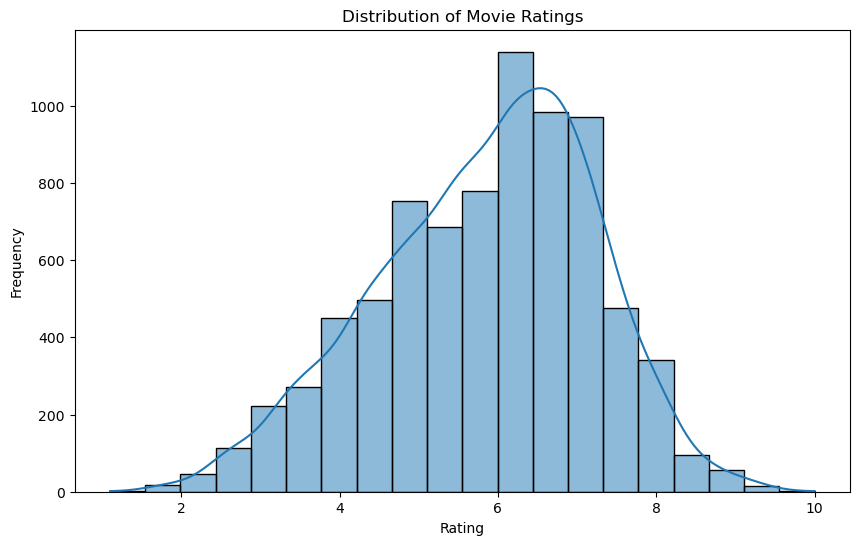

In [18]:
# Plot distribution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

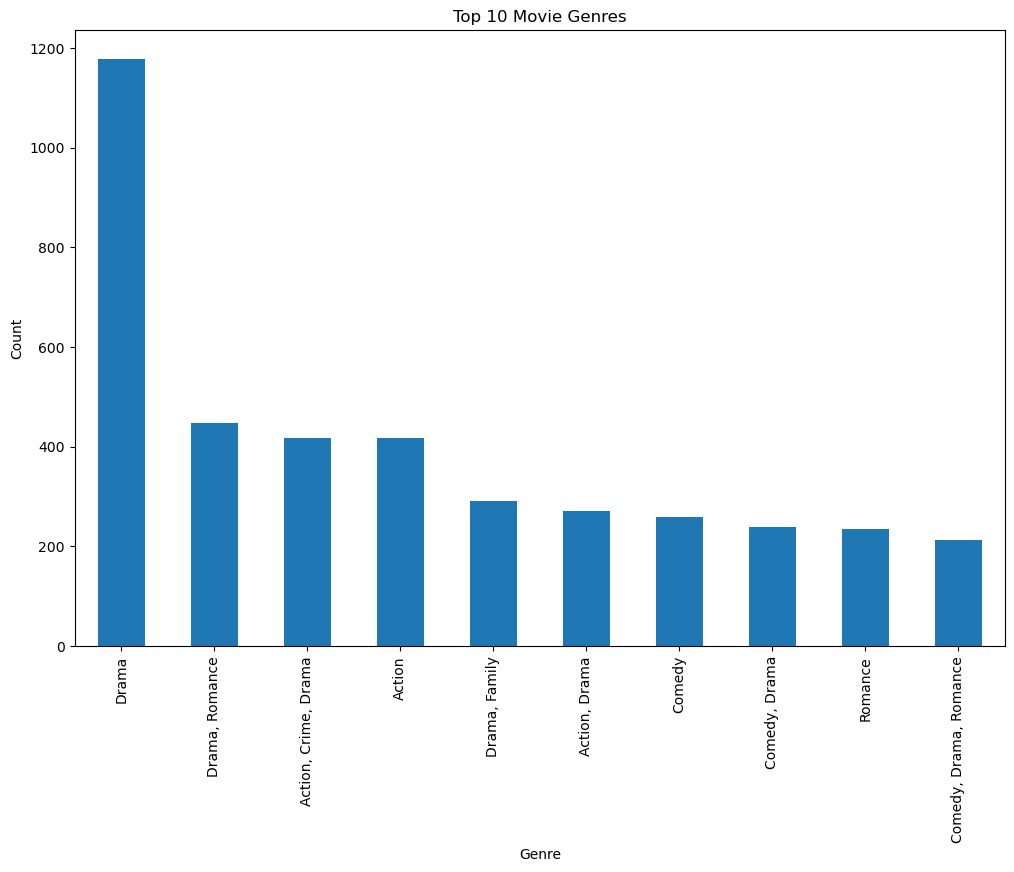

In [19]:
# Plot count of movies by Genre
plt.figure(figsize=(12, 8))
movies_df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

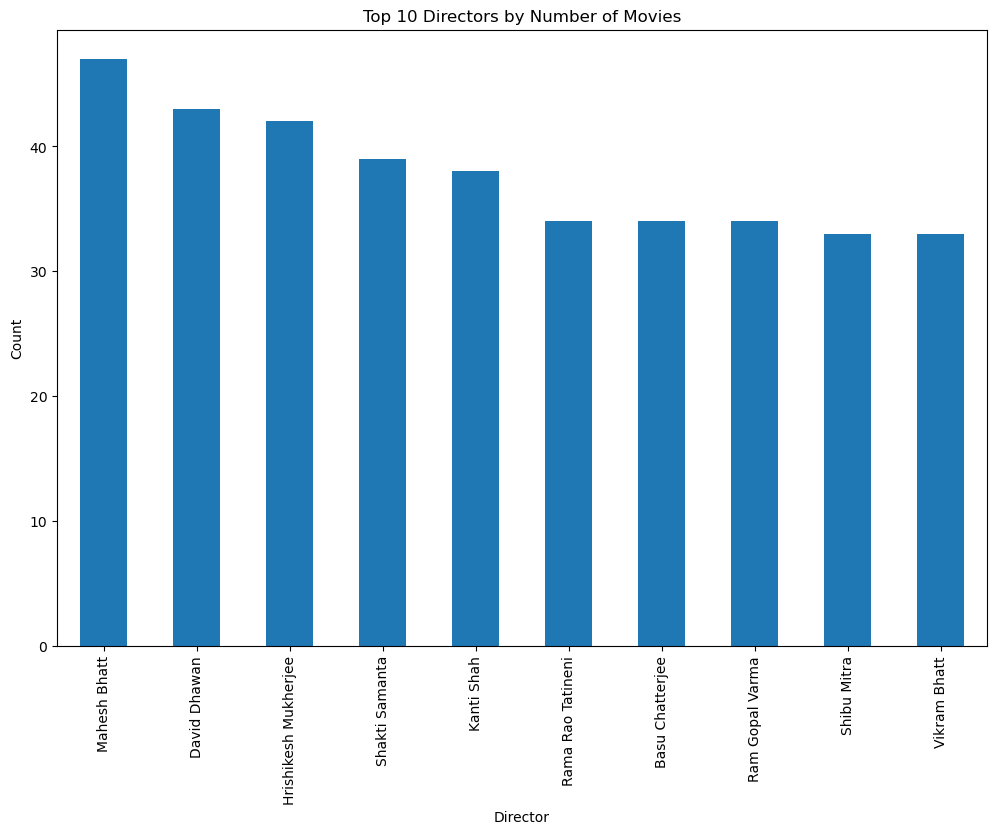

In [20]:
# Top 10 Directors by number of movies
plt.figure(figsize=(12, 8))
movies_df['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
X = movies_df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]
y = movies_df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for numerical features
numerical_features = ['Duration', 'Votes']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.9090863846801346
Mean Squared Error: 1.430919233392957
R-squared: 0.23033484470264698


# <h3>Inference</h3>
<p>The model achieved a Mean Absolute Error (MAE) of approximately 0.91, indicating that, on average, the predicted movie ratings are within 0.91 points of the actual ratings. The Mean Squared Error (MSE) is around 1.43, reflecting the average squared difference between the predicted and actual ratings, which is slightly higher due to larger errors being more penalized. The R-squared value of 0.23 suggests that the model explains about 23% of the variance in movie ratings based on the provided features. While the model provides some predictive power, there is substantial room for improvement, possibly through additional feature engineering, more sophisticated modeling techniques, or by gathering more detailed and comprehensive data.</p>